Data Minning project

This project is done by\
Saish Mhatre\
Gandhar Pansare\
Tanmayee Tanjane\
Guide - Britain Taylor

model 1\
brief overview of what we are doing ?
We are trying to do sentiment analysis on memes for that we have taken data from kaggle which contains all the images which are about 6992 images and one excel file with all the comments and their sentiment mentioned in it, We have tried to buid model which will predict the sentiment based on text only.
this code is for model number one here we have used all predefined model the models include roberta model ,

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
!pip install nltk

In [33]:
# downloading stopwords for our preproceesing using ntlk package to do so
import pandas as pd
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [29]:
# Read in data
meme_data = pd.read_csv('/content/drive/MyDrive/memes data/labels.csv', index_col=[0])
print(meme_data.shape)

(6992, 4)


In [30]:
meme_data.head()
meme_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 0 to 6991
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_name         6992 non-null   object
 1   text_ocr           6831 non-null   object
 2   text_corrected     6987 non-null   object
 3   overall_sentiment  6992 non-null   object
dtypes: object(4)
memory usage: 273.1+ KB


In [34]:
'''here we are initializing a set of English stop words using the NLTK library. Stop words are commonly used words in english lanuage we remove
these wors in order to reduce the size and noise in the data as these words don't add much information needed for processing to this data'''
from nltk.corpus import stopwords
stopwords.words('english')
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [35]:
'''here we are standardizing the data we are making it lowercase, removing numerical digits, '.com' occurrences, and punctuation.'''
import re
import string

def standardization(data_standard):
    data_standard = data_standard.apply(lambda x: x.lower())
    data_standard = data_standard.apply(lambda x: re.sub(r'\d+', '', x))
    data_standard = data_standard.apply(lambda x: re.sub(r'.com', '', x, flags=re.MULTILINE))
    data_standard = data_standard.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    return data_standard

'''here the 'text_corrected' column from meme_data is converted to a pandas Series. It is then converted to string type using astype(str).
The standardization function is applied to the 'text_corrected' column, and the result is assigned back to the same column.'''
data1=meme_data['text_corrected']
data1=data1.astype(str)
meme_data['text_corrected'] = standardization(data1)

In [36]:
meme_data['text_corrected'] = meme_data['text_corrected'].apply(remove_stop_words)

in our model 1 first thing we are using is VADER.\
The VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon is a pre-built sentiment analysis tool in nltk that is particularly useful for analyzing sentiments in texts. The SentimentIntensityAnalyzer class provides a straightforward interface to perform sentiment analysis using VADER's sentiment scores.\
here we are importing those files and making an instance calles SIA

In [37]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [38]:
#Here we are creating a dictionary which will store all the results obtained from Vader instance
result_dictionary = {}
for i, row in tqdm(meme_data.iterrows(), total=len(meme_data)):
    text = row['text_corrected']
    text=str(text)
    myid = row['image_name']
    myid=str(myid)
    result_dictionary[myid] = SIA.polarity_scores(text)

  0%|          | 0/6992 [00:00<?, ?it/s]

In [39]:
#let's see some of the results and its sentiments
vaders_model_data= pd.DataFrame(result_dictionary).T
vaders_model_data

,neg,neu,pos,compound
image_1.jpg,0.000,0.504,0.496,0.7096
image_2.jpeg,0.000,0.704,0.296,0.6369
image_3.JPG,0.000,0.843,0.157,0.4215
image_4.png,0.000,0.411,0.589,0.5106
image_5.png,0.000,0.431,0.569,0.5574
...,...,...,...,...
image_6988.jpg,0.119,0.723,0.157,0.2263
image_6989.jpg,0.000,1.000,0.000,0.0000
image_6990.png,0.313,0.246,0.441,0.8957
image_6991.jpg,0.000,1.000,0.000,0.0000


In [40]:
#combining tis data with our original dataset using join operation
vaders_model_data= vaders_model_data.reset_index().rename(columns={'index': 'image_name'})
vaders_model_data= vaders_model_data.merge(meme_data, how='left')

In [41]:
vaders_model_data.head()

,image_name,neg,neu,pos,compound,text_ocr,text_corrected,overall_sentiment
0,image_1.jpg,0.0,0.504,0.496,0.7096,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,look friend lightyear sohalikut trend play yea...,very_positive
1,image_2.jpeg,0.0,0.704,0.296,0.6369,The best of #10 YearChallenge! Completed in le...,best yearchallengepleted less years kudus nare...,very_positive
2,image_3.JPG,0.0,0.843,0.157,0.4215,Sam Thorne @Strippin ( Follow Follow Saw every...,sam thorne strippin follow follow saw everyone...,positive
3,image_4.png,0.0,0.411,0.589,0.5106,10 Year Challenge - Sweet Dee Edition,year challenge sweet dee edition,positive
4,image_5.png,0.0,0.431,0.569,0.5574,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,year challenge filter hilarious year challenge...,neutral


Now we are converting the text data into numeric varibales so that we can use them to pass to our model and used for prediction and accuracy calculation.

In [42]:
sentiment=vaders_model_data['overall_sentiment']

In [43]:
#code taken from google with minor modifications made to accomodate data
def map_sentiment(sentiment):
    if sentiment == 'very_positive':
        return 5
    elif sentiment == 'positive':
        return 4
    elif sentiment == 'neutral':
        return 3
    elif sentiment == 'negative':
        return 2
    else:
        return 1

rating=[]
for i in range (0,len(vaders)):
  m=map_sentiment(sentiment[i])
  m=int(m)
  rating.append(m)

vaders_model_data['Ratings']=np.array(rating)
vaders_model_data.head()

,image_name,neg,neu,pos,compound,text_ocr,text_corrected,overall_sentiment,Ratings
0,image_1.jpg,0.0,0.504,0.496,0.7096,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,look friend lightyear sohalikut trend play yea...,very_positive,5
1,image_2.jpeg,0.0,0.704,0.296,0.6369,The best of #10 YearChallenge! Completed in le...,best yearchallengepleted less years kudus nare...,very_positive,5
2,image_3.JPG,0.0,0.843,0.157,0.4215,Sam Thorne @Strippin ( Follow Follow Saw every...,sam thorne strippin follow follow saw everyone...,positive,4
3,image_4.png,0.0,0.411,0.589,0.5106,10 Year Challenge - Sweet Dee Edition,year challenge sweet dee edition,positive,4
4,image_5.png,0.0,0.431,0.569,0.5574,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,year challenge filter hilarious year challenge...,neutral,3


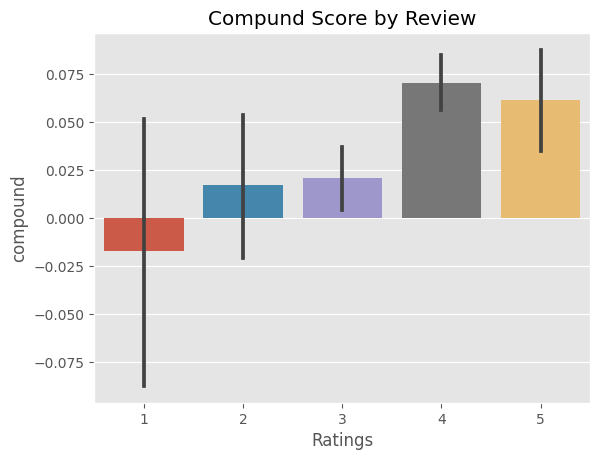

In [44]:
# here is the graph for compound score calculated by the vader model lets look into the results
ax = sns.barplot(data=vaders_model_data, x='Ratings', y='compound')
ax.set_title('Compund Score by Review')
plt.show()

if we focus on the graph we can see to some extent the model is predicting the sentiments, we can see for higher rating that is positive rating the model prediction are fine but for lower ratings like 1 and 2 we can see model predictions are not that good(indicate by the lines)
please note compound is the overall score calculated by the model.
to get more insights into it, lets check other score and try to plot the graph for them.

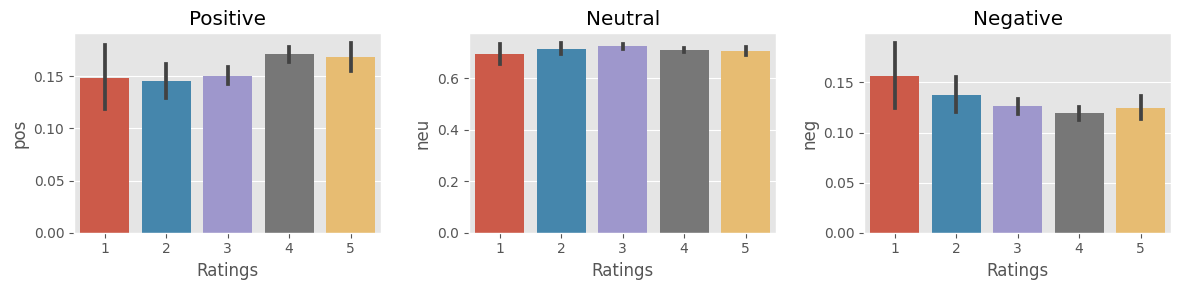

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders_model_data, x='Ratings', y='pos', ax=axs[0])
sns.barplot(data=vaders_model_data, x='Ratings', y='neu', ax=axs[1])
sns.barplot(data=vaders_model_data, x='Ratings', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

here we can see for neutral values the model is predicting great but for positive nad negative values the probability is less and and as ratings suggest the positive graph should br left skewed and negative graph should be right skewed.\
if we look closer we can see some of that in graphs but it is not distinctive therefor we can conclude that even though model is predicting neutral values good it is not predicting positive nad negative values to that extent. hence we'll try another model.

In [46]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [47]:
text = meme_data['text_corrected']
labels = meme_data['overall_sentiment']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2)


Now we'll try to mkae some predictions with roberta model on our text dtaset for that first we'll download the model and store it in our model variable name.

In [63]:
'''here we are using  pre-trained model "twitter-roberta-base-sentiment" model from Cardiff NLP,
specifically trained for sentiment analysis on Twitter data.'''
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
#taking autotokenizer from pretrained model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
#loading the pretrained model
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [74]:
#storing the test lebels for testing data into sentiment1 vaariable
sentiment1=y_test

0       very_positive
1       very_positive
2            positive
3            positive
4             neutral
            ...      
6987          neutral
6988          neutral
6989         positive
6990    very_positive
6991         positive
Name: overall_sentiment, Length: 6992, dtype: object

In [76]:
#code taken from google with minor modifications made to accomodate data
#Now converting this variables to numeric vales and storing them in rating data
# please note that these are numeric y test values
def map_sentiment1(sentiment1):
    if sentiment1 == 'very_positive':
        return 2
    elif sentiment1 == 'positive':
        return 2
    elif sentiment1 == 'neutral':
        return 1
    elif sentiment1 == 'negative':
        return 0
    else:
        return 0

rating=[]
for i in sentiment1:
  m=map_sentiment1(i)
  m=int(m)
  rating.append(m)


In [77]:
#here we are fitting the model and predicting the sentiment and storing it in y predicted value
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis", model=MODEL)

# Make predictions on the test set
X_test_str = [str(text) for text in X_test]

# Make predictions using the pipeline
y_pred = [result["label"] for result in sent_pipeline(X_test_str)]
print(len(y_pred))

1399


In [78]:
#code taken from google with minor modifications made to accomodate data
#here as done earlier we are converting the predicted label output to numeric values to calculate the accuracy of our model
def map_sentiment2(sentiment2):
    if sentiment2 == 'LABEL_2':
        return 2
    elif sentiment2 == 'LABEL_1':
        return 1
    else:
        return 0

rating2=[]
for i in range (0,len(y_pred)):
  m=map_sentiment2(y_pred[i])
  m=int(m)
  rating2.append(m)

In [80]:
#finding the testing result for this model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(rating,rating2)
recall = recall_score(rating,rating2, average='weighted')
precision = precision_score(rating,rating2, average='weighted')
f1 = f1_score(rating,rating2, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.27591136526090065
Recall: 0.27591136526090065
Precision: 0.4913079072107731
F1 Score: 0.2532353604936419


From these results we can conclude that.

Accuracy: 0.2759 - an accuracy of 0.2759 means that approximately 27.59% of the predictions made by the model are correct.


Recall: 0.2759 - it means that 27.59% of the actual positive sentiments were correctly identified by the model.


Precision: 0.4913 - precision of 0.4913 indicates that, out of all instances predicted as positive by the model, approximately 49.13% are truly positive.


F1 Score: 0.2532 - F1 Score is the weighted average of precision and recall. It takes both false positives and false negatives into account.
An F1 Score of 0.2532 suggests a balance between precision and recall, considering the trade-off between false positives and false negatives.


from these outputs we can say our model is not performing that great with only just 27% accuracy that too for three classes of sentiments. The low accuracy and F1 Score suggest that the model may not be performing well overall.



In [89]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [90]:
'''we are using this dictionary to store the sentiment analysis results, where the keys are the image names (myid) and the values are the sentiment predictions for the corresponding text.'''
result_dictionary1 = {}
for i, row in tqdm(meme_data.iterrows(), total=len(meme_data)):
    text = row['text_corrected']
    text=str(text)
    myid = row['image_name']
    myid=str(myid)
    #here we are applying sentiment analysis model on text and storing the result of that in the dictionary
    result_dictionary1[myid] = sent_pipeline(text)

  0%|          | 0/6992 [00:00<?, ?it/s]

In [92]:
#storing the dictionary resukt in datframe and viewing first few results
results_df1 = pd.DataFrame(result_dictionary1).T
results_df1

,0
image_1.jpg,"{'label': 'POSITIVE', 'score': 0.942264199256897}"
image_2.jpeg,"{'label': 'POSITIVE', 'score': 0.949141800403595}"
image_3.JPG,"{'label': 'NEGATIVE', 'score': 0.9719430208206..."
image_4.png,"{'label': 'POSITIVE', 'score': 0.9935070276260..."
image_5.png,"{'label': 'POSITIVE', 'score': 0.9980680346488..."
...,...
image_6988.jpg,"{'label': 'NEGATIVE', 'score': 0.6351538896560..."
image_6989.jpg,"{'label': 'POSITIVE', 'score': 0.9992088675498..."
image_6990.png,"{'label': 'POSITIVE', 'score': 0.9852768778800..."
image_6991.jpg,"{'label': 'NEGATIVE', 'score': 0.9814795851707..."


In [93]:
#please note we have taken this code from bard with few modifications to fit our data

# Create an empty DataFrame to store the results
result_df = pd.DataFrame()

# Iterate over the keys of the dictionary
for key in result_dictionary1:
    value = result_dictionary1[key]

    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(value)

    # Add a column for 'image_name' with the current key value
    df['image_name'] = key

    # Concatenate the current DataFrame to the result_df
    result_df = pd.concat([result_df, df], ignore_index=True)

# Display the resulting DataFrame
print(result_df)

         label     score      image_name
0     POSITIVE  0.942264     image_1.jpg
1     POSITIVE  0.949142    image_2.jpeg
2     NEGATIVE  0.971943     image_3.JPG
3     POSITIVE  0.993507     image_4.png
4     POSITIVE  0.998068     image_5.png
...        ...       ...             ...
6987  NEGATIVE  0.635154  image_6988.jpg
6988  POSITIVE  0.999209  image_6989.jpg
6989  POSITIVE  0.985277  image_6990.png
6990  NEGATIVE  0.981480  image_6991.jpg
6991  NEGATIVE  0.504245  image_6992.jpg

[6992 rows x 3 columns]


Now we'll preprocess the data and join it the dictionary for our analysis

In [94]:
results_df1 = results_df1.reset_index().rename(columns={'index': 'image_name'})
results_df1

,image_name,0
0,image_1.jpg,"{'label': 'POSITIVE', 'score': 0.942264199256897}"
1,image_2.jpeg,"{'label': 'POSITIVE', 'score': 0.949141800403595}"
2,image_3.JPG,"{'label': 'NEGATIVE', 'score': 0.9719430208206..."
3,image_4.png,"{'label': 'POSITIVE', 'score': 0.9935070276260..."
4,image_5.png,"{'label': 'POSITIVE', 'score': 0.9980680346488..."
...,...,...
6987,image_6988.jpg,"{'label': 'NEGATIVE', 'score': 0.6351538896560..."
6988,image_6989.jpg,"{'label': 'POSITIVE', 'score': 0.9992088675498..."
6989,image_6990.png,"{'label': 'POSITIVE', 'score': 0.9852768778800..."
6990,image_6991.jpg,"{'label': 'NEGATIVE', 'score': 0.9814795851707..."


In [95]:
results_df1 = results_df1.merge(meme_data, how='left')

In [97]:
from google.colab import data_table
from vega_datasets import data
final_df = pd.merge(meme_data, result_df[['label', 'score', 'image_name']], how='left', on='image_name')

data_table.DataTable(final_df)

,image_name,text_ocr,text_corrected,overall_sentiment,Ratings,label,score
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,look friend lightyear sohalikut trend play yea...,very_positive,5,POSITIVE,0.942264
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,best yearchallengepleted less years kudus nare...,very_positive,5,POSITIVE,0.949142
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,sam thorne strippin follow follow saw everyone...,positive,4,NEGATIVE,0.971943
3,image_4.png,10 Year Challenge - Sweet Dee Edition,year challenge sweet dee edition,positive,4,POSITIVE,0.993507
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,year challenge filter hilarious year challenge...,neutral,3,POSITIVE,0.998068
...,...,...,...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,tuesday mardi gras wednesday valentines friday...,neutral,3,NEGATIVE,0.635154
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,must watch movies iti chennai memes maanagaram...,neutral,3,POSITIVE,0.999209
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,less talking planning soda junk foodplaining w...,positive,4,POSITIVE,0.985277
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,time fantasy one time unless make time arhtist...,very_positive,5,NEGATIVE,0.981480


In [98]:
#we are chnaging our five class values to 3 class values to predict the sentiment and below is the code for doing so
final_df['Ratings'].replace(5, 4, inplace=True)
try:
  final_df['Ratings'].replace(1, 2, inplace=True)
except:
  print("error")

In [99]:
sentiment1=final_df['label']

In [100]:
#code taken from google with minor modifications made to accomodate data
def map_sentiment1(sentiment):
    if sentiment == 'POSITIVE':
        return 4
    elif sentiment == 'NEUTRAL':
        return 3
    else:
        return 2

rating=[]
for i in range (0,len(final_df)):
  m=map_sentiment1(sentiment1[i])
  m=int(m)
  rating.append(m)

final_df['Ratings_calculated']=np.array(rating)
final_df.head()

,image_name,text_ocr,text_corrected,overall_sentiment,Ratings,label,score,Ratings_calculated
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,look friend lightyear sohalikut trend play yea...,very_positive,4,POSITIVE,0.942264,4
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,best yearchallengepleted less years kudus nare...,very_positive,4,POSITIVE,0.949142,4
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,sam thorne strippin follow follow saw everyone...,positive,4,NEGATIVE,0.971943,2
3,image_4.png,10 Year Challenge - Sweet Dee Edition,year challenge sweet dee edition,positive,4,POSITIVE,0.993507,4
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,year challenge filter hilarious year challenge...,neutral,3,POSITIVE,0.998068,4


In [101]:
Ratings1 = final_df['Ratings']
Ratings_calculated1 = final_df['Ratings_calculated']

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(Ratings1, Ratings_calculated1)
precision_train = precision_score(Ratings1, Ratings_calculated1, average='weighted')
recall_train = recall_score(Ratings1, Ratings_calculated1, average='weighted')
f1_train = f1_score(Ratings1, Ratings_calculated1, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
print("The Training Performance is:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}\n")

The Training Performance is:
Accuracy: 0.2597
Precision: 0.3705
Recall: 0.2597
F1 Score: 0.2683



The sentiment analysis model, applied to meme text content using the Hugging Face sentiment analysis model, exhibits the following training performance:


Accuracy (0.2597): The model accurately predicts the sentiment of meme text content for approximately 25.97% of instances in the training dataset.


Precision (0.3705): When the model predicts a positive sentiment for memes, it is correct around 37.05% of the time.


Recall (0.2597): The model successfully identifies approximately 25.97% of memes with positive sentiment out of the total actual positive instances.


F1 Score (0.2683): The F1 Score, representing the balance between precision and recall, is approximately 26.83%.
Interpretation:

The sentiment analysis model's training performance on memes suggests a moderate ability to discern sentiment from textual content.
Accuracy, precision, recall, and F1 score indicate a trade-off between correctly identifying positive sentiments and avoiding false positives and false negatives.


Next Steps:

Evaluation on a separate validation/test dataset is crucial to assess the model's generalization performance.
Consider fine-tuning the model, adjusting hyperparameters, or exploring other sentiment analysis models to potentially enhance performance.
Investigate the characteristics of meme text data and the sentiment distribution to gain insights into model predictions.

here we can see that if we run the text model through any predefined sentiment analysis model the accuracy of the data is not that good hence we need to build our own model also we have seen that getting good accuracy with just single modle in not possible in this NLP example and dataset hence we have to chnage our approach and combine varius models for prediction.

alng with that we have to also include the image data into our analysis as they can also give us better results compared to text only model. hence, in next step we'll try to use multimodal method for this NLP model we'll comine tect and image data for prediction and we'll use multiple predefined models with ach other to increase the accuracy of this prediction.

Please find the implementation of this thing in model 2 of our project.